In [28]:
# Questions:
# 1. Diabetes Set: (20 Points)
# a. Find all patients with Diabetes using the codes above by listing their patient IDs.
# b. Find the cardinality of the Diabetes set.

# 2. COVID Set: (20 Points)
# a. Find all patients with COVID using the codes above by listing their patient IDs.
# b. Find the cardinality of the COVID set.

# 3. Intersection Set (20 Points)
# a. Find all patients with Diabetes and COVID using the codes above by listing their patient IDs.
# b. Find the cardinality of the Intersection set.

# 4. Union Set (20 Points)
# a. Find all patients with Diabetes or COVID using the codes above by listing their patient IDs.
# b. Find the cardinality of the Intersection set.

# 5. Draw a Venn diagram showing the Diabetes, COVID, Intersection and Union sets. You might need to use a package. (40 points)

# 6. Diabetes only after COVID Set (30 points)
# a. Now including the date of diagnosis, find all patients with Diabetes only after they had
# COVID by listing their patient IDs.
# b. Find the cardinality of the Diabetes only after COVID set.
# c. Provide a count breakdown for each of the diabetes codes listed above occurring only after COVID.

In [29]:
# Imports and Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

file_path = r"C:\Users\kolby\OneDrive\Documents\School\UofU\Spring 2024\Biomedical Data Wrangling\Data Wrangling Assignments\DW3_set_exercise.csv"
full_df = pd.read_csv(file_path)
print(full_df)

       Unnamed: 0  Patient ID Diagnosis Code        Date
0               0   4725559.0          E03.9  2020-09-20
1               1   7637008.0          R53.1  2019-10-27
2               2   5068050.0          I48.1  2020-11-22
3               3   1342235.0          E11.9  2022-01-27
4               4   4520230.0          N39.0  2020-05-17
...           ...         ...            ...         ...
40601       40601   5728765.0          R53.0  2022-02-11
40602       40602   1806928.0          E03.9  2020-10-29
40603       40603    269579.0          J20.9  2021-02-10
40604       40604   4173184.0          M54.5  2019-12-12
40605       40605   1340228.0            E11  2020-07-25

[40606 rows x 4 columns]


In [30]:
#1.a.

dia_codes = ['E08', 'E09', 'E10', 'E11', 'E13']

dia_df = full_df[full_df['Diagnosis Code'].str.contains('|'.join(dia_codes))]

diabetes_patients = dia_df['Patient ID'].unique
print("Diabetes Patients")
print(diabetes_patients)

Diabetes Patients
<bound method Series.unique of 3        1342235.0
13       1841379.0
15       6120921.0
19       3465224.0
29       1358532.0
           ...    
40585    2810484.0
40587    5804887.0
40595    7160137.0
40596    6607308.0
40605    1340228.0
Name: Patient ID, Length: 7224, dtype: float64>


In [31]:
#1.b.
dia_card = dia_df.apply(lambda x: x.nunique()).prod()
print("Cardinality of Diabetes set:", dia_card)

Cardinality of Diabetes set: 369524395800


In [32]:
#2.a.
cov_codes = ['U07.1', 'J12.82']

cov_df = full_df[full_df['Diagnosis Code'].str.contains('|'.join(cov_codes))]

covid_patients = cov_df['Patient ID'].unique
print("COVID Patients")
print(covid_patients)

COVID Patients
<bound method Series.unique of 31       5692899.0
44        665176.0
52       3651321.0
76       1282153.0
91       5112391.0
           ...    
40535    1407181.0
40544    6967147.0
40553    5331556.0
40557    5080120.0
40598    2398290.0
Name: Patient ID, Length: 2026, dtype: float64>


In [33]:
#2.b.
cov_card = cov_df.apply(lambda x: x.nunique()).prod()
print("Cardinality of COVID set:", cov_card)

Cardinality of COVID set: 7161281940


In [34]:
#3.a.
dia_patients = full_df[full_df['Diagnosis Code'].str.startswith(tuple(dia_codes))]
cov_patients = full_df[full_df['Diagnosis Code'].isin(cov_codes)]
inter_df = dia_patients[dia_patients['Patient ID'].isin(cov_patients['Patient ID'])]

inter_patients = inter_df['Patient ID'].unique
print("Intersection of COVID and Diabetes Patients")
print(inter_patients)

Intersection of COVID and Diabetes Patients
<bound method Series.unique of 84       3929198.0
147      4330450.0
456      7307359.0
510      4588797.0
605      2465811.0
           ...    
39390    4908235.0
39412     266223.0
40005    2831596.0
40055     626112.0
40059    4322839.0
Name: Patient ID, Length: 224, dtype: float64>


In [35]:
#3.b.
inter_card = inter_df.apply(lambda x: x.nunique()).prod()
print("Cardinality of COVID and Diabetes set:", inter_card)

Cardinality of COVID and Diabetes set: 69895168


In [36]:
#4.a.
union_codes = ['U07.1', 'J12.82', 'E08', 'E09', 'E10', 'E11', 'E13']

union_df = full_df[full_df['Diagnosis Code'].str.contains('|'.join(union_codes))]

union_patients = union_df['Patient ID'].unique
print("Union of COVID and Diabetes Patients")
print(union_patients)

Union of COVID and Diabetes Patients
<bound method Series.unique of 3        1342235.0
13       1841379.0
15       6120921.0
19       3465224.0
29       1358532.0
           ...    
40587    5804887.0
40595    7160137.0
40596    6607308.0
40598    2398290.0
40605    1340228.0
Name: Patient ID, Length: 9250, dtype: float64>


In [37]:
#4.b.
union_card = union_df.apply(lambda x: x.nunique()).prod()
print("Cardinality of COVID and Diabetes set:", union_card)

Cardinality of COVID and Diabetes set: 771328899000


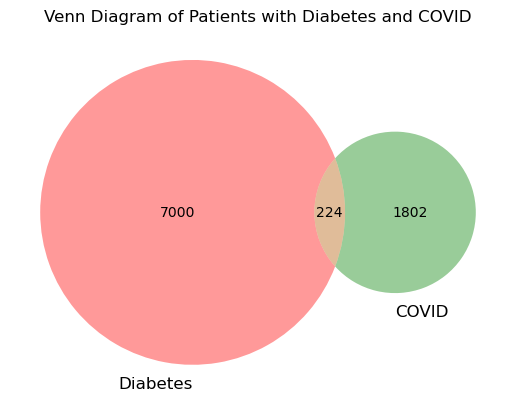

In [38]:
#5.
diabetes_set = set(range(7224))
covid_set = set(range(2026))
both_set = set(range(224))
venn2(subsets=(len(diabetes_set - both_set), len(covid_set - both_set), len(both_set)),
      set_labels=('Diabetes', 'COVID'))

plt.title("Venn Diagram of Patients with Diabetes and COVID")
plt.show()

In [39]:
#6.a.
cov_patients = full_df[full_df['Diagnosis Code'].isin(cov_codes)]
first_covid_dates = cov_patients.groupby('Patient ID')['Date'].min().reset_index()

dia_patients = full_df[full_df['Diagnosis Code'].str.startswith(tuple(dia_codes))]
after_df = pd.merge(dia_patients, first_covid_dates, on='Patient ID', suffixes=('', '_first_covid'))
after_df = after_df[after_df['Date'] > after_df['Date_first_covid']]

after_patients = after_df['Patient ID'].unique()
print("Patients with diabetes after COVID")
print(after_patients)

Patients with diabetes after COVID
[3929198. 7307359. 4588797. 2465811. 7542154. 2299370. 4030547.  138575.
  222248. 2805177.  788972. 3591475. 1441531. 1464780. 7588462. 2301586.
 5316149. 6523303. 5615770. 7609020. 7588327.  227866. 6142172. 3636206.
 2827584. 2320798. 2369658. 7181285. 6615827. 4852233.  663704. 6471767.
 3464904. 7231631. 5931449.  620623.  482256. 3385968. 4282462. 3812900.
 4056916.  175474. 7373904. 1811725. 4159922.  818167. 1700963. 1346682.
 5744768.  734644. 5595625. 2986113. 3651321. 5159103. 5855408. 2483513.
 1856152. 6379191. 4678019. 5637379. 4595704. 3459970. 2028809. 5055782.
 5588458.  628441. 6617399. 3428304. 3091854. 1781822. 1603639. 6450265.
 6029907. 7635276.  606183. 4927942. 6399983. 2481330. 7631360. 2356742.
 5019777. 7193414. 2629565. 6028000. 1165591. 1610879. 4406239. 5878004.
 4859240. 3058621. 2646629. 4908235.  626112. 4322839.]


In [40]:
#6.b.
after_card = after_df.apply(lambda x: x.nunique()).prod()
print("Cardinality of COVID and Diabetes set:", after_card)

Cardinality of COVID and Diabetes set: 500939348


In [41]:
diagnosis_code_frequency = after_df['Diagnosis Code'].value_counts()
print(diagnosis_code_frequency)

Diagnosis Code
E11      17
E13      16
E10      16
E11.9    14
E08      13
E13.9    10
E09       8
Name: count, dtype: int64
